In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
import dataframe_image as dfi
#Dependencies
import gensim #the library for Topic modelling
from gensim.models.ldamulticore import LdaMulticore
from gensim import corpora, models

from nltk.corpus import stopwords
import string
from nltk.stem.wordnet import WordNetLemmatizer



In [2]:
from main_function_social import clean_data

In [3]:
xl = "C:\\Users\\zachi\\Desktop\\final_project_22\\data_nov_21.xlsx"

month = 'November'

platform = "Twitter"

new_df = clean_data (xl,month,platform)



c:\Users\zachi\FOA-TAU-Data-analysis-project\report for social platforms\main_function_social.py:29: FutureWarning: The default value of regex will change from True to False in a future version.
  posts_description=posts_description.str.lower().str.replace('[^\w\s]','')


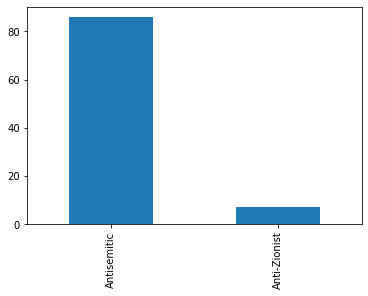

In [4]:
#Plot the categories data
df_selection = new_df
post_count_by_category_plot = df_selection["Category"].value_counts().plot(kind='bar')#, title = "Posts category of" + user_selection)

plt.savefig("post_count_by_category_plot_specific.png",dpi='figure',
        bbox_inches= 'tight', pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None)

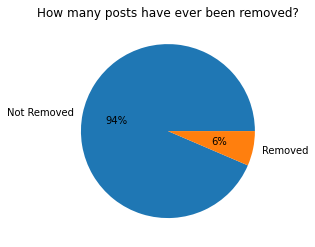

In [5]:
#Cheking the percentage of posts removing in general view

status = df_selection["Removed"]

general_removal_view = status.value_counts() #get general info about the removal process of platforms

removal_posts_statistics_plot = general_removal_view.plot(kind = "pie" , autopct='%1.0f%%', title = "How many posts have ever been removed?") 

removal_posts_statistics_plot.get_yaxis().set_visible(False)

plt.savefig("removal_posts_statistics_plot.png",dpi='figure',
        bbox_inches= 'tight', pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None)



In [6]:

outpot_category_removal_stats= df_selection.groupby(['Removed', 'Category'])['Category'].count().unstack('Category').fillna(0).astype(int).reindex(index = ['Removed', 'Not Removed'])
outpot_category_removal_stats = outpot_category_removal_stats.astype("int")

dfi.export(outpot_category_removal_stats,"outpot_category_removal_stats.png")


In [7]:
#Gropping the data by removal status + platform and plot a percentage summary of the data


precentage_chart = outpot_category_removal_stats/outpot_category_removal_stats[outpot_category_removal_stats.columns].sum()*100

precentage_chart_plot = precentage_chart.round(1).astype(str) +'%'

dfi.export(precentage_chart_plot,"precentage_chart_plot.png")



In [9]:

from matplotlib.backends.backend_pdf import PdfPages
from fpdf import FPDF


pdf = FPDF()

pdf.add_page()

pdf.set_font('Arial', size = 16)

pdf.cell(40)

pdf.cell(75, 10,'Report for' + " "+ platform + " " + '|' + " " + month, 0, 2, 'C')

pdf.cell(90, 10, '', 0, 2, 'C')
pdf.cell(-20)

pdf.image("post_count_by_category_plot_specific.png")

pdf.cell(90, 10, '', 0, 2, 'C')
pdf.cell(5)

pdf.cell(90, 10, '', 0, 2, 'C')
pdf.cell(5)

pdf.cell(90, 10, '', 0, 2, 'C')
pdf.cell(5)

pdf.image("removal_posts_statistics_plot.png")

pdf.cell(90, 10, '', 0, 2, 'C')
pdf.cell(5)

pdf.cell(90, 10, '', 0, 2, 'C')
pdf.cell(5)

pdf.cell(90, 10, '', 0, 2, 'C')
pdf.cell(5)

pdf.image("outpot_category_removal_stats.png")


pdf.cell(90, 10, '', 0, 2, 'C')
pdf.cell(1)

pdf.cell(90, 10, '', 0, 2, 'C')
pdf.cell(1)

pdf.cell(90, 10, '', 0, 2, 'C')
pdf.cell(1)


pdf.image("precentage_chart_plot.png")



pdf.output("Report for social media platforms individually.pdf")


os.startfile("Report for social media platforms individually.pdf")
